In [2]:
import pandas as pd 
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freg = 'MS'
df1.head()



,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.tail()

NameError: name 'df' is not defined

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [27]:
training_data = df.iloc[:100]
test_data = df.iloc[100:]

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


fitted_model = ExponentialSmoothing(training_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [34]:
test_predictions = fitted_model.forecast(44).rename('HW forecast')

In [35]:
test_predictions

1957-05-01    349.047960
1957-06-01    397.822053
1957-07-01    444.097473
1957-08-01    438.941948
1957-09-01    389.671702
1957-10-01    341.995083
1957-11-01    300.365721
1957-12-01    342.956643
1958-01-01    351.855937
1958-02-01    345.164160
1958-03-01    402.008831
1958-04-01    392.797944
1958-05-01    394.310425
1958-06-01    449.409253
1958-07-01    501.685394
1958-08-01    495.861331
1958-09-01    440.202013
1958-10-01    386.342973
1958-11-01    339.315363
1958-12-01    387.429222
1959-01-01    397.482523
1959-02-01    389.922997
1959-03-01    454.138948
1959-04-01    443.733647
1959-05-01    445.442258
1959-06-01    507.685974
1959-07-01    566.740974
1959-08-01    560.161682
1959-09-01    497.284793
1959-10-01    436.441634
1959-11-01    383.315763
1959-12-01    437.668741
1960-01-01    449.025695
1960-02-01    440.485894
1960-03-01    513.028987
1960-04-01    501.274389
1960-05-01    503.204563
1960-06-01    573.519674
1960-07-01    640.232576
1960-08-01    632.800120


<AxesSubplot:xlabel='Month'>

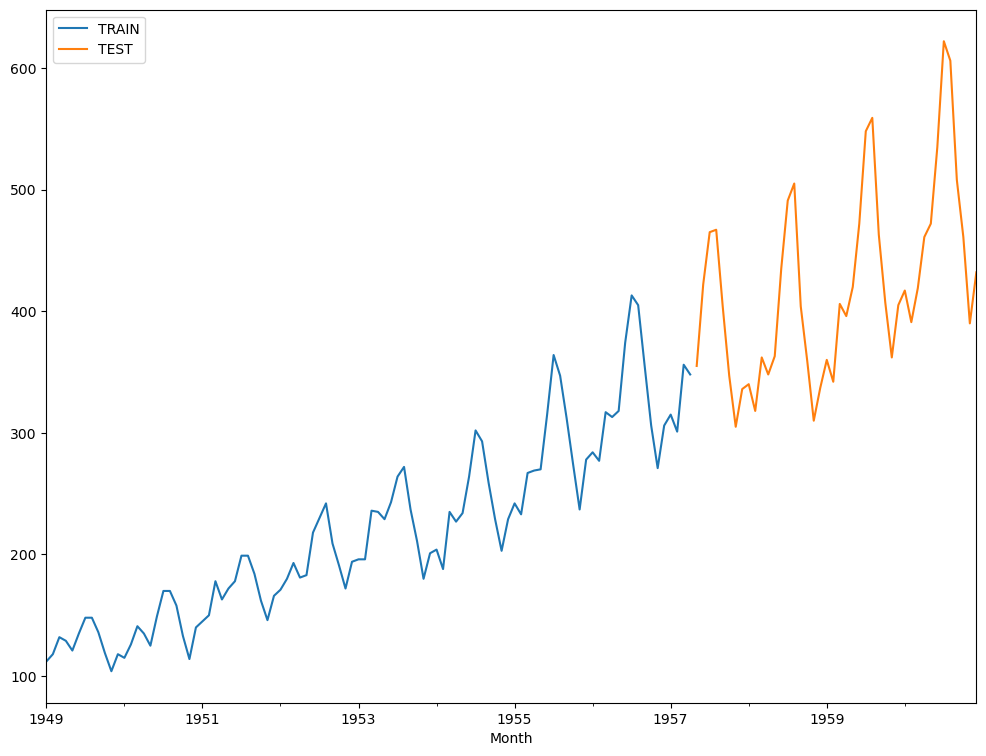

In [18]:
training_data['Thousands of Passengers'] .plot(legend=True, label='TRAIN')
test_data['Thousands of Passengers'] .plot(legend=True, label='TEST', figsize=(12,9))

<AxesSubplot:xlabel='Month'>

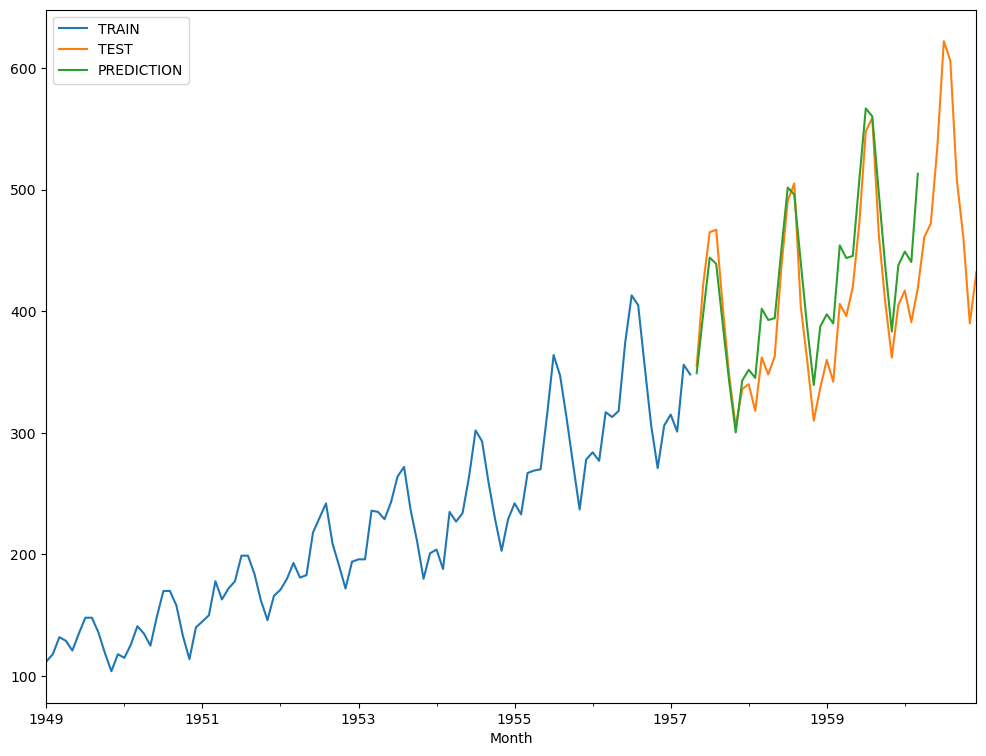

In [19]:
training_data['Thousands of Passengers'] .plot(legend=True, label='TRAIN')
test_data['Thousands of Passengers'] .plot(legend=True, label='TEST', figsize=(12,9))
test_predictions.plot(legend=True,label='PREDICTION')

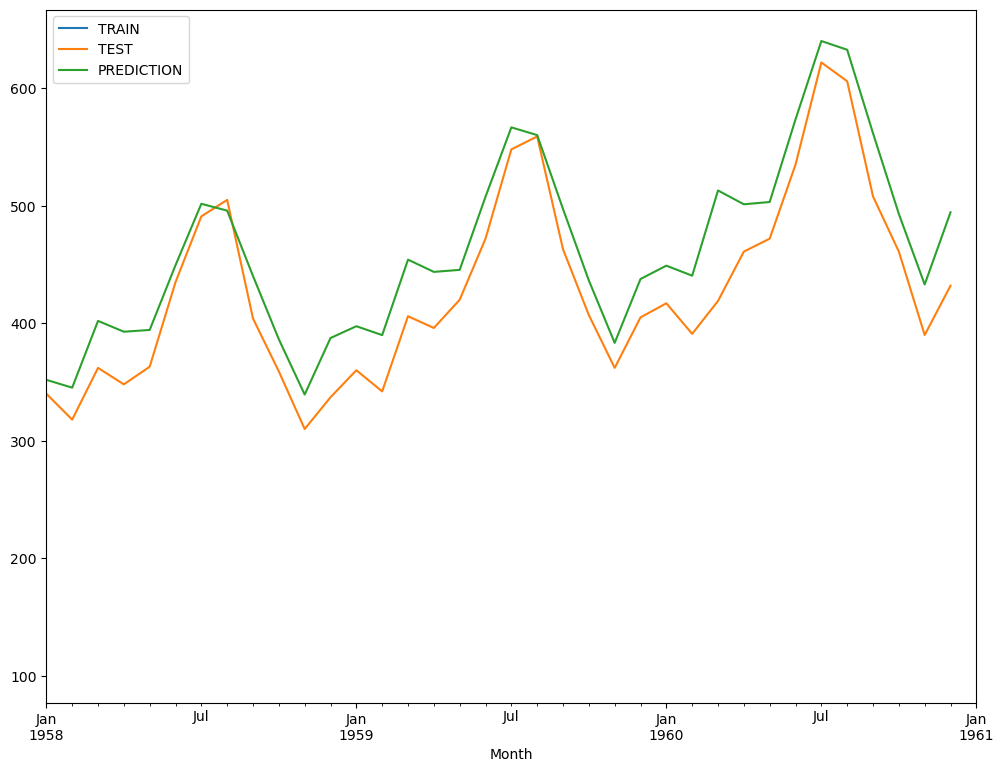

In [41]:
training_data['Thousands of Passengers'] .plot(legend=True, label='TRAIN')
test_data['Thousands of Passengers'] .plot(legend=True, label='TEST', figsize=(12,9))
test_predictions.plot(legend=True,label='PREDICTION', xlim=['1958-01-01', '1961-01-01']);

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
mean_absolute_error(test_data, test_predictions)

30.557230307316107

In [37]:
mean_squared_error(test_data, test_predictions)

1243.6962166296876

In [38]:
np.sqrt(mean_squared_error(test_data, test_predictions))

35.266077420514

In [40]:
test_data.describe()

,Thousands of Passengers
count,44.000000
mean,421.068182
std,77.330279
min,305.000000
25%,359.750000
50%,406.500000
75%,465.500000
max,622.000000


In [43]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [44]:
forecast_predictions = final_model.forecast(44)

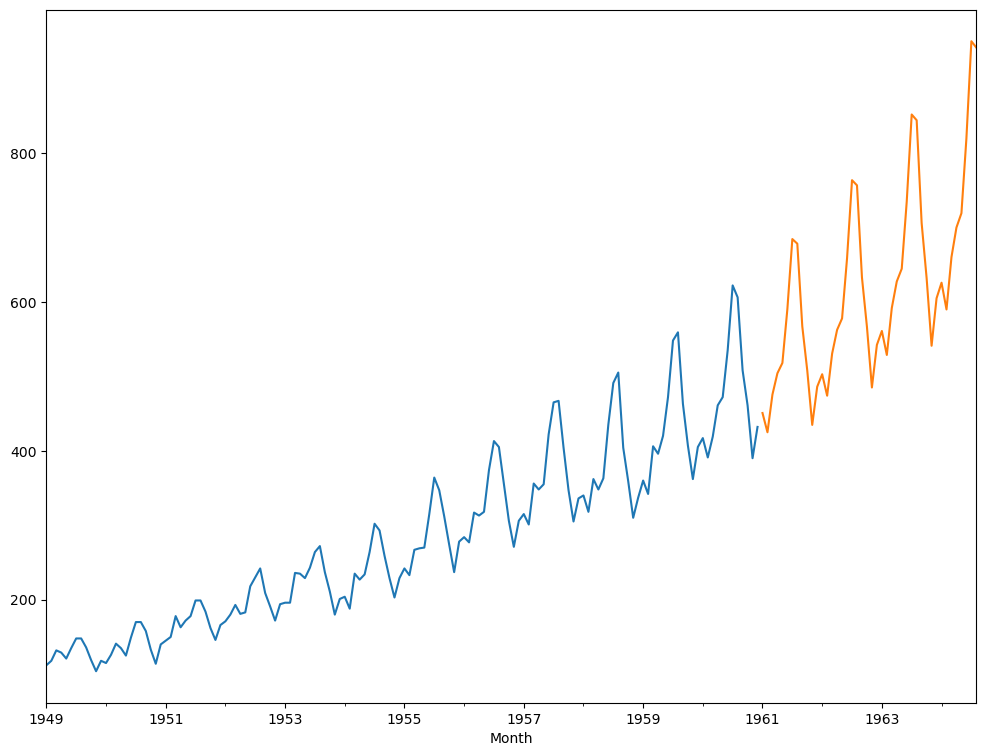

In [47]:
df['Thousands of Passengers'].plot(figsize=(12,9))
forecast_predictions.plot();